In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [10]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler

In [14]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


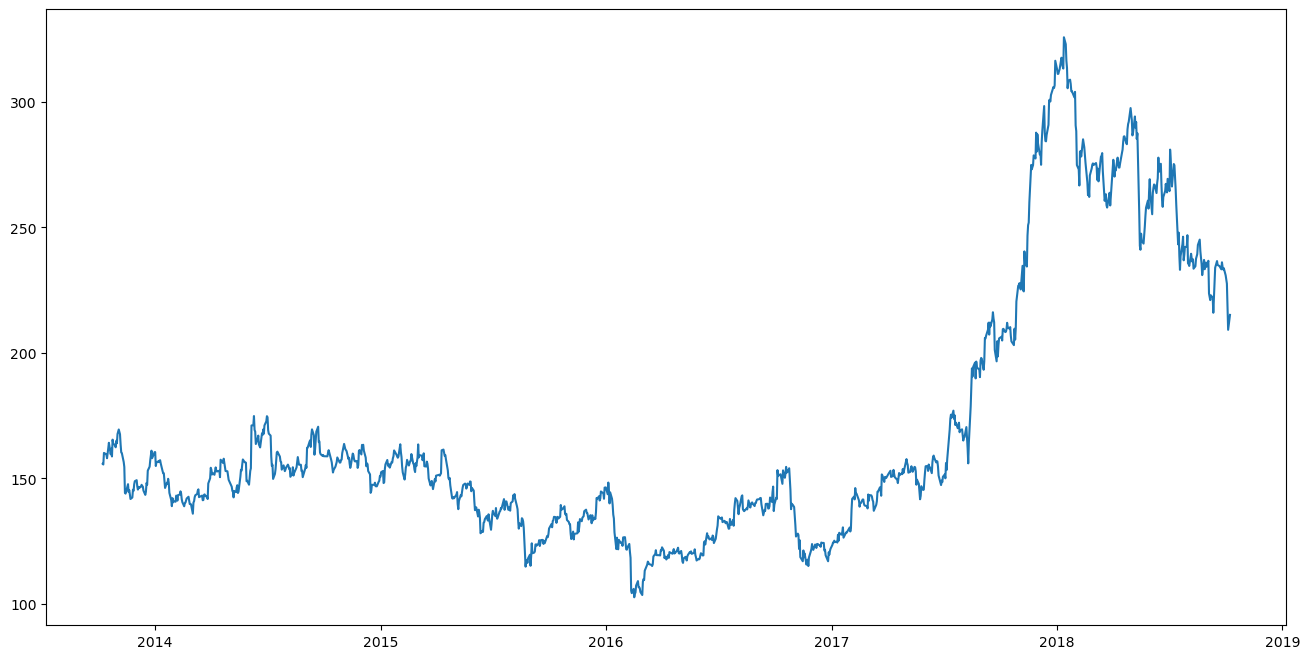

In [16]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.index = df["Date"]

plt.figure(figsize=(16,8))
plt.plot(df["Close"], label='Closing Price History')

In [17]:
sorted_index_df = df.sort_index(ascending = True, axis = 0)
filtered_df = pd.DataFrame(index=sorted_index_df.index, columns=["Close"])

for i in range(0,len(df)):
    filtered_df["Close"][i] = sorted_index_df["Close"][i]
filtered_df.head()

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_df)
scaled_data[:5]

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       [0.25728373],
       [0.25459435]])

In [19]:
train_data = list(scaled_data[:987,0])
time_step = 60

X_train = []
y_train = []
for i in range(time_step, len(train_data)):
    X_train.append(train_data[i-time_step:i])
    y_train.append(train_data[i])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(loss="mean_squared_error", optimizer="adam")
lstm_model.fit(X_train, y_train, epochs= 50,batch_size=64, verbose=2)

Epoch 1/50
15/15 - 17s - loss: 0.0104 - 17s/epoch - 1s/step
Epoch 2/50
15/15 - 2s - loss: 0.0026 - 2s/epoch - 161ms/step
Epoch 3/50
15/15 - 2s - loss: 0.0019 - 2s/epoch - 127ms/step
Epoch 4/50
15/15 - 2s - loss: 0.0014 - 2s/epoch - 128ms/step
Epoch 5/50
15/15 - 2s - loss: 0.0011 - 2s/epoch - 136ms/step
Epoch 6/50
15/15 - 2s - loss: 0.0011 - 2s/epoch - 143ms/step
Epoch 7/50
15/15 - 2s - loss: 0.0011 - 2s/epoch - 150ms/step
Epoch 8/50
15/15 - 2s - loss: 0.0011 - 2s/epoch - 143ms/step
Epoch 9/50
15/15 - 2s - loss: 9.7986e-04 - 2s/epoch - 139ms/step
Epoch 10/50
15/15 - 2s - loss: 0.0010 - 2s/epoch - 124ms/step
Epoch 11/50
15/15 - 2s - loss: 0.0010 - 2s/epoch - 121ms/step
Epoch 12/50
15/15 - 2s - loss: 9.7064e-04 - 2s/epoch - 129ms/step
Epoch 13/50
15/15 - 2s - loss: 8.9574e-04 - 2s/epoch - 142ms/step
Epoch 14/50
15/15 - 2s - loss: 8.9909e-04 - 2s/epoch - 154ms/step
Epoch 15/50
15/15 - 2s - loss: 9.6922e-04 - 2s/epoch - 164ms/step
Epoch 16/50
15/15 - 2s - loss: 8.7000e-04 - 2s/epoch - 163ms

In [21]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
validation_data = list(scaled_data[987 - time_step:,0])

X_test = []
y_test = []
for i in range(time_step, len(validation_data)):
    X_test.append(validation_data[i-time_step:i])
    y_test.append(validation_data[i])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_close_price = lstm_model.predict(X_test)
predicted_close_price = scaler.inverse_transform(predicted_close_price)

8/8 [==============================] - 3s 33ms/step


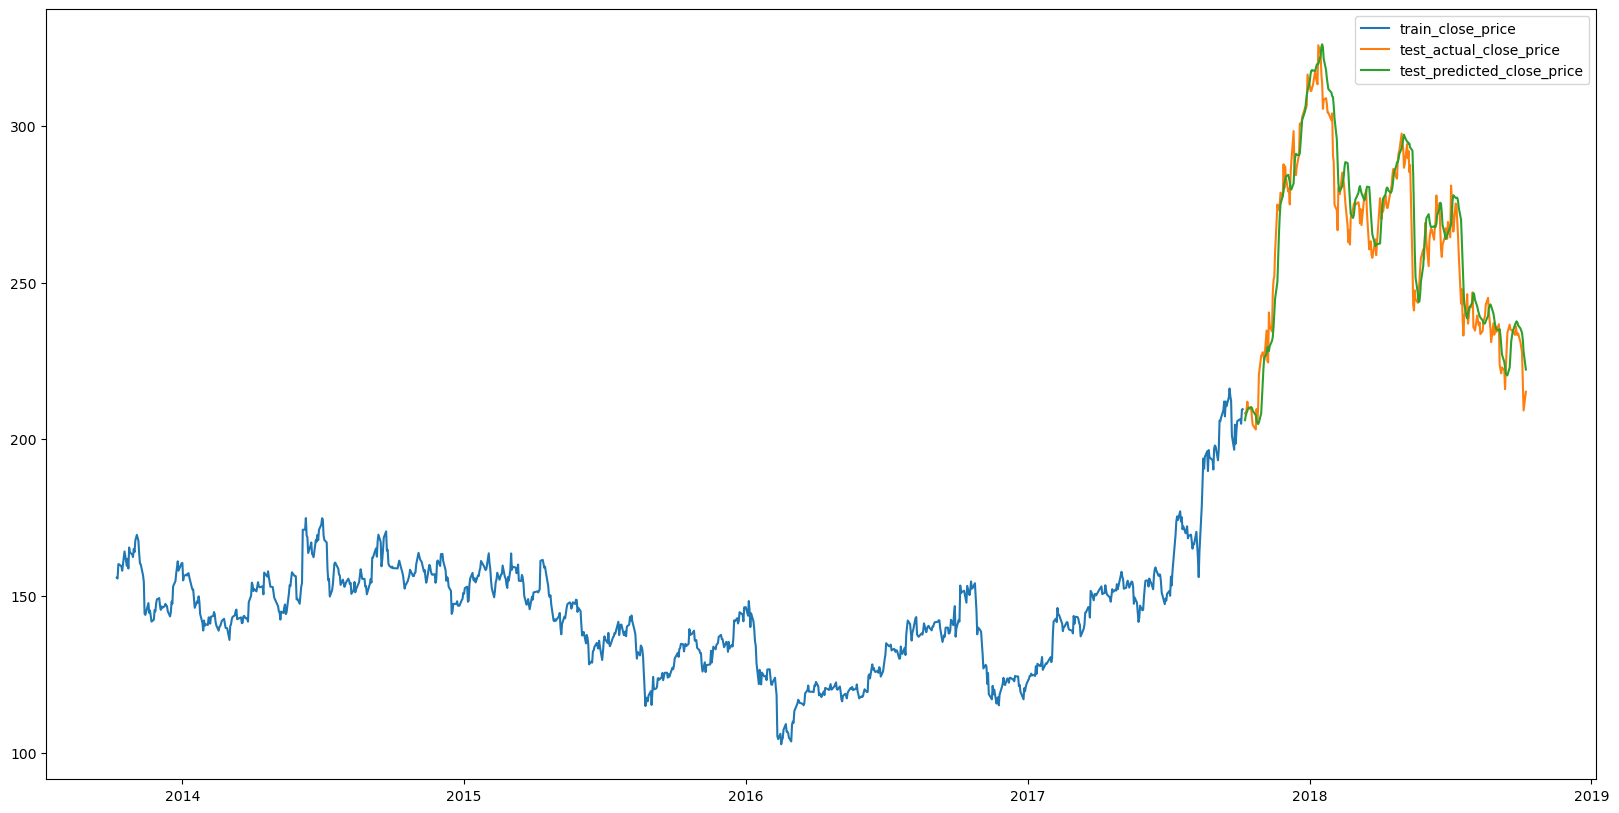

In [23]:
train_data = filtered_df[:987]
validation_data = filtered_df[987:]
validation_data["Predicted_close_price"] = predicted_close_price
plt.plot(train_data["Close"], label="train_close_price")
plt.plot(validation_data["Close"], label="test_actual_close_price")
plt.plot(validation_data["Predicted_close_price"], label="test_predicted_close_price")
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_score = mape(list(validation_data["Close"]), list(validation_data["Predicted_close_price"]))
print(mape_score)

0.02583925671760514


In [25]:
print(np.mean(list(validation_data["Close"])))

262.6685483870968
